In [1]:
import os
import pandas as pd

In [2]:
os.chdir('A:\Imarticus\python project')

In [3]:
train=pd.read_csv('final_train_data.csv')

In [4]:
test=pd.read_csv('final_test_data.csv')

In [5]:
train.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,...,default_ind,Source,last_credit_pull_d,last_pymnt_d,revol_util,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,collections_12_mths_ex_med,emp_length
0,16000,36,7.69,A,A4,MORTGAGE,70000.0,Source Verified,n,credit_card,...,0,train,Jan-16,Dec-15,37.4,170.0,307771.0,22100.0,0.0,10 plus year
1,8100,36,7.90,A,A4,RENT,105000.0,Not Verified,n,debt_consolidation,...,0,train,Jan-16,Dec-15,41.1,0.0,105703.0,101400.0,0.0,10 plus year
2,25000,36,7.12,A,A3,MORTGAGE,118000.0,Verified,n,debt_consolidation,...,0,train,Jan-16,Dec-15,45.9,0.0,467473.0,379000.0,0.0,10 plus year
3,20000,36,14.65,C,C5,MORTGAGE,107500.0,Verified,n,home_improvement,...,0,train,Jan-16,Jan-16,97.4,0.0,506918.0,10300.0,0.0,6 years
4,13725,60,15.59,D,D1,RENT,120000.0,Source Verified,n,debt_consolidation,...,0,train,Jan-16,Jan-16,46.7,0.0,46611.0,4300.0,0.0,less than 1 year


In [6]:
train.dtypes

loan_amnt                       int64
term                            int64
int_rate                      float64
grade                          object
sub_grade                      object
home_ownership                 object
annual_inc                    float64
verification_status            object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
total_acc                     float64
initial_list_status            object
out_prncp                     float64
total_pymnt                   float64
total_rec_int                 float64
total_rec_late_fee              int64
recoveries                      int64
last_pymnt_amnt               float64
application_type               object
acc_now_delinq                  int64
default_ind 

In [7]:
train['default_ind']=train['default_ind'].astype(str)
#train['acc_now_delinq']=train['acc_now_delinq'].astype(str)
#train.inq_last_6mths=train.inq_last_6mths.astype(str)
train.term=train.term.astype(str)

In [8]:
test['default_ind']=test['default_ind'].astype(str)
#test['acc_now_delinq']=test['acc_now_delinq'].astype(str)
#test.inq_last_6mths=test.inq_last_6mths.astype(str)
test.term=test.term.astype(str)

In [9]:
train.dtypes

loan_amnt                       int64
term                           object
int_rate                      float64
grade                          object
sub_grade                      object
home_ownership                 object
annual_inc                    float64
verification_status            object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
total_acc                     float64
initial_list_status            object
out_prncp                     float64
total_pymnt                   float64
total_rec_int                 float64
total_rec_late_fee              int64
recoveries                      int64
last_pymnt_amnt               float64
application_type               object
acc_now_delinq                  int64
default_ind 

In [10]:
test.dtypes

loan_amnt                       int64
term                           object
int_rate                      float64
grade                          object
sub_grade                      object
home_ownership                 object
annual_inc                    float64
verification_status            object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
total_acc                     float64
initial_list_status            object
out_prncp                     float64
total_pymnt                   float64
total_rec_int                 float64
total_rec_late_fee              int64
recoveries                      int64
last_pymnt_amnt               float64
application_type               object
acc_now_delinq                  int64
default_ind 

In [11]:
train['Source']='Train'
test['Source']='Test'

In [12]:
fulldata=pd.concat([train,test],axis=0)

In [13]:
fulldata.dtypes

loan_amnt                       int64
term                           object
int_rate                      float64
grade                          object
sub_grade                      object
home_ownership                 object
annual_inc                    float64
verification_status            object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
total_acc                     float64
initial_list_status            object
out_prncp                     float64
total_pymnt                   float64
total_rec_int                 float64
total_rec_late_fee              int64
recoveries                      int64
last_pymnt_amnt               float64
application_type               object
acc_now_delinq                  int64
default_ind 

In [14]:
li=['term',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [15]:
for c in li:
    print(c in list(fulldata))

True
True
True
True
True
True
True
True
True
True
False
True
True


In [16]:
cat_vars=[]
for cols in list(fulldata):
    if(fulldata[cols].dtype==object):
        cat_vars.append(cols)

In [17]:
cont_var=[]
for cols in list(fulldata):
    if(fulldata[cols].dtype!=object):
        cont_var.append(cols)

In [18]:
cont_var

['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'last_pymnt_amnt',
 'acc_now_delinq',
 'revol_util',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'collections_12_mths_ex_med']

In [19]:
cat_vars

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'initial_list_status',
 'application_type',
 'default_ind',
 'Source',
 'last_credit_pull_d',
 'last_pymnt_d',
 'emp_length']

In [20]:
drop_cols=cat_vars

In [21]:
drop_cols.remove('Source')
drop_cols.remove('default_ind')

In [22]:
fulldata.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,...,default_ind,Source,last_credit_pull_d,last_pymnt_d,revol_util,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,collections_12_mths_ex_med,emp_length
0,16000,36,7.69,A,A4,MORTGAGE,70000.0,Source Verified,n,credit_card,...,0,Train,Jan-16,Dec-15,37.4,170.0,307771.0,22100.0,0.0,10 plus year
1,8100,36,7.90,A,A4,RENT,105000.0,Not Verified,n,debt_consolidation,...,0,Train,Jan-16,Dec-15,41.1,0.0,105703.0,101400.0,0.0,10 plus year
2,25000,36,7.12,A,A3,MORTGAGE,118000.0,Verified,n,debt_consolidation,...,0,Train,Jan-16,Dec-15,45.9,0.0,467473.0,379000.0,0.0,10 plus year
3,20000,36,14.65,C,C5,MORTGAGE,107500.0,Verified,n,home_improvement,...,0,Train,Jan-16,Jan-16,97.4,0.0,506918.0,10300.0,0.0,6 years
4,13725,60,15.59,D,D1,RENT,120000.0,Source Verified,n,debt_consolidation,...,0,Train,Jan-16,Jan-16,46.7,0.0,46611.0,4300.0,0.0,less than 1 year


In [23]:
dummy=pd.get_dummies(fulldata[drop_cols])

In [24]:
dummy.shape

(487771, 329)

In [25]:
fulldata1=fulldata.drop(drop_cols,axis=1)

In [26]:
fulldata1=pd.concat([fulldata1,dummy],axis=1)

In [27]:
fulldata1.dtypes

loan_amnt                        int64
int_rate                       float64
annual_inc                     float64
dti                            float64
delinq_2yrs                      int64
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
total_acc                      float64
out_prncp                      float64
total_pymnt                    float64
total_rec_int                  float64
total_rec_late_fee               int64
recoveries                       int64
last_pymnt_amnt                float64
acc_now_delinq                   int64
default_ind                     object
Source                          object
revol_util                     float64
tot_coll_amt                   float64
tot_cur_bal                    float64
total_rev_hi_lim               float64
collections_12_mths_ex_med     float64
term_36                          uint8
term_60                          uint8
grade_A                  

In [28]:
fulldata1.shape

(487771, 352)

In [29]:
#fulldata1.to_csv('dummified_f.csv',index=False)

In [30]:
final_train=fulldata1[fulldata1.Source=='Train']

In [31]:
final_test=fulldata1[fulldata1.Source=='Test']

In [32]:
final_train.shape

(230780, 352)

In [33]:
final_test.shape

(256991, 352)

In [34]:
'Source' in list(final_test)

True

In [35]:
'Source' in list(final_train)

True

# modelling

In [36]:
train_x=final_train.drop(['default_ind','Source'],axis=1).copy()
train_y=final_train['default_ind'].copy()
test_x=final_test.drop(['default_ind','Source'],axis=1).copy()
test_y=final_test['default_ind'].copy()

In [37]:
#M1

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
features = train_x
label = train_y
clf = RandomForestClassifier(random_state = 42)
clf = clf.fit(features, label)
model = SelectFromModel(clf, prefit=True)
feature_idx = model.get_support()
feature_name = train_x.columns[feature_idx]
list(feature_name)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_rec_int',
 'last_pymnt_amnt',
 'revol_util',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'term_36',
 'term_60',
 'grade_A',
 'verification_status_Not Verified',
 'initial_list_status_f',
 'initial_list_status_w',
 'last_credit_pull_d_Dec-15',
 'last_credit_pull_d_Jan-16',
 'last_credit_pull_d_Nov-15',
 'last_credit_pull_d_Oct-15',
 'last_pymnt_d_Aug-15',
 'last_pymnt_d_Dec-14',
 'last_pymnt_d_Dec-15',
 'last_pymnt_d_Jan-16',
 'last_pymnt_d_Jul-15',
 'last_pymnt_d_Jun-15',
 'last_pymnt_d_Mar-15',
 'last_pymnt_d_May-15',
 'last_pymnt_d_Nov-15',
 'last_pymnt_d_Oct-15',
 'last_pymnt_d_Sep-15']

In [39]:
list1=['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'open_acc',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_rec_int',
 'last_pymnt_amnt',
 'revol_util',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'term_36',
 'term_60',
 'grade_A',
 'initial_list_status_f',
 'last_credit_pull_d_Dec-15',
 'last_credit_pull_d_Jan-16',
 'last_credit_pull_d_Nov-15',
 'last_credit_pull_d_Oct-15',
 'last_pymnt_d_Apr-15',
 'last_pymnt_d_Aug-15',
 'last_pymnt_d_Dec-15',
 'last_pymnt_d_Jan-16',
 'last_pymnt_d_Jul-15',
 'last_pymnt_d_Jun-15',
 'last_pymnt_d_Nov-15',
 'last_pymnt_d_Oct-15',
 'last_pymnt_d_Sep-15']

In [40]:
train_x_f1=train_x[list1]

In [41]:
#left here

In [42]:
train_y_f1=train_y

In [43]:
test_x_f1=test_x[list1]
test_y_f1=test_y

In [44]:
M1_Model = clf.fit(train_x_f1, train_y_f1)

In [45]:
Test_Pred = clf.predict(test_x_f1)

In [46]:
Test_Pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [59]:
from sklearn.metrics import confusion_matrix
Confusion_Mat = confusion_matrix(test_y, Test_Pred) # R, C format (Actual = Test_Y, Predicted = Test_Pred)
Confusion_Mat 

array([[248574,   8106],
       [     5,    306]], dtype=int64)

In [48]:
from sklearn.metrics import roc_curve, auc

# model 2

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [61]:
x,y=train_x,train_y

In [62]:
clf1 = ExtraTreesClassifier(n_estimators=50)

In [63]:
clf1 = clf.fit(x, y)

In [66]:
model2 = SelectFromModel(clf1, prefit=True)
feature_idx = model2.get_support()
feature_name1 = train_x.columns[feature_idx]
list(feature_name1)

['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_rec_int',
 'last_pymnt_amnt',
 'revol_util',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'term_36',
 'term_60',
 'grade_A',
 'grade_B',
 'home_ownership_MORTGAGE',
 'home_ownership_RENT',
 'verification_status_Not Verified',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'addr_state_CA',
 'initial_list_status_f',
 'initial_list_status_w',
 'last_credit_pull_d_Dec-15',
 'last_credit_pull_d_Jan-16',
 'last_credit_pull_d_Nov-15',
 'last_credit_pull_d_Oct-15',
 'last_pymnt_d_Apr-15',
 'last_pymnt_d_Aug-14',
 'last_pymnt_d_Aug-15',
 'last_pymnt_d_Dec-14',
 'last_pymnt_d_Dec-15',
 'last_pymnt_d_Feb-15',
 'last_pymnt_d_Jan-15',
 'last_pymnt_d_Jan-16',
 'last_pymnt_d_Jul-14',
 'last_pymnt_d_Jul-15',
 'last_pymnt_d_Jun-15',
 'last_pymnt_d_Mar-15',
 'last_pymnt_d_May-15',
 'last_pymnt_d_No

In [67]:
list_f=['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_rec_int',
 'last_pymnt_amnt',
 'revol_util',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'term_36',
 'term_60',
 'grade_A',
 'grade_B',
 'home_ownership_MORTGAGE',
 'home_ownership_RENT',
 'verification_status_Not Verified',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'addr_state_CA',
 'initial_list_status_f',
 'initial_list_status_w',
 'last_credit_pull_d_Dec-15',
 'last_credit_pull_d_Jan-16',
 'last_credit_pull_d_Nov-15',
 'last_credit_pull_d_Oct-15',
 'last_pymnt_d_Apr-15',
 'last_pymnt_d_Aug-14',
 'last_pymnt_d_Aug-15',
 'last_pymnt_d_Dec-14',
 'last_pymnt_d_Dec-15',
 'last_pymnt_d_Feb-15',
 'last_pymnt_d_Jan-15',
 'last_pymnt_d_Jan-16',
 'last_pymnt_d_Jul-14',
 'last_pymnt_d_Jul-15',
 'last_pymnt_d_Jun-15',
 'last_pymnt_d_Mar-15',
 'last_pymnt_d_May-15',
 'last_pymnt_d_Nov-14',
 'last_pymnt_d_Nov-15',
 'last_pymnt_d_Oct-14',
 'last_pymnt_d_Oct-15',
 'last_pymnt_d_Sep-14',
 'last_pymnt_d_Sep-15',
 'emp_length_10 plus year']

In [64]:
pred_y2=clf1.predict(test_x)


In [65]:
from sklearn.metrics import confusion_matrix
Confusion_Mat = confusion_matrix(test_y_f1,pred_y2) # R, C format (Actual = Test_Y, Predicted = Test_Pred)
Confusion_Mat 

array([[256632,     48],
       [    66,    245]], dtype=int64)

# logistic regression

In [68]:
from statsmodels.api import Logit

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
import numpy as np

In [71]:
logreg = LogisticRegression()

In [72]:
logistic1= logreg.fit(train_x,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
test_x1=test_x.copy()

In [74]:
test_x1['pred']=logistic1.predict(test_x1)

In [75]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, test_x1['pred'])
cnf_matrix

array([[256607,     73],
       [    64,    247]], dtype=int64)

In [76]:
print("Training set score: {:.3f}".format(logistic1.score(train_x,train_y)))
print("Test set score: {:.3f}".format(logistic1.score(test_x,test_y)))

Training set score: 0.972
Test set score: 0.999


In [77]:
from sklearn.metrics import classification_report

In [79]:
report=classification_report(test_y, test_x1['pred'])
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.77      0.79      0.78       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.89      0.90      0.89    256991
weighted avg       1.00      1.00      1.00    256991



In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

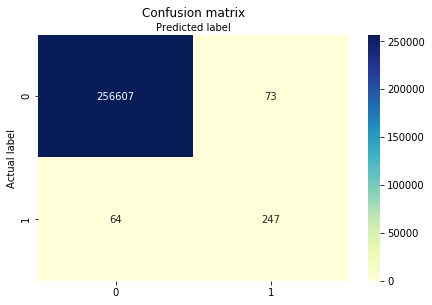

In [82]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [83]:
from sklearn.metrics import roc_curve, auc

In [86]:
y_test_pred=logreg.predict_proba(test_x)[::,1]

In [87]:
fpr, tpr, _ = metrics.roc_curve(test_y.astype(int),  test_x1['pred'].astype(int))

In [88]:
auc = metrics.roc_auc_score(test_y, test_x1['pred'].astype(int))

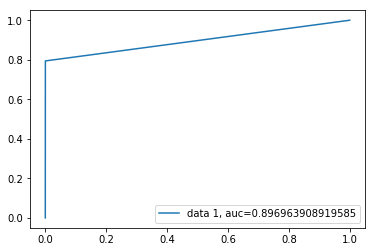

In [89]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Logistic Model 2

In [90]:
train_x2=train_x[list_f]
train_y2=train_y
test_x2=test_x[list_f]
test_y2=test_y

In [91]:
logistic2= logreg.fit(train_x2,train_y2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
print("Training set score: {:.3f}".format(logistic2.score(train_x2,train_y2)))
print("Test set score: {:.3f}".format(logistic2.score(test_x2,test_y2)))

Training set score: 0.973
Test set score: 0.999


In [93]:
test_x2['pred']=logistic1.predict(test_x2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
from sklearn import metrics
cnf_matrix2 = metrics.confusion_matrix(test_y2, test_x2['pred'])
cnf_matrix2

array([[256608,     72],
       [    64,    247]], dtype=int64)

In [97]:
y_test_pred2=logreg.predict_proba(test_x2.drop('pred',axis=1))[::,1]

In [102]:
fpr, tpr, threshold = metrics.roc_curve(test_y2.astype(int),  test_x2['pred'].astype(int))

In [103]:
auc = metrics.roc_auc_score(test_y2, test_x2['pred'].astype(int))

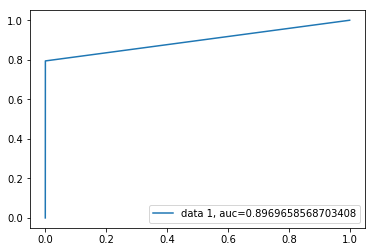

In [104]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [105]:
threshold

array([2, 1, 0])

In [109]:
import pylab as pl

In [113]:
import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning,RuntimeWarning) 
warnings.filterwarnings("ignore") 

        fpr       tpr     1-fpr        tf  threshold
1  0.000281  0.794212  0.999719 -0.205507          1


[]

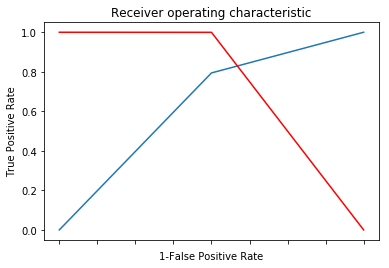

In [114]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]
print(roc.ix[(roc.tf-0).abs().argsort()[:1]])
# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [115]:
report1=classification_report(test_y2, test_x2['pred'])
print(report1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.77      0.79      0.78       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.89      0.90      0.89    256991
weighted avg       1.00      1.00      1.00    256991



In [116]:
accuracy=((cnf_matrix2[0][0] + cnf_matrix2[1][1])/test_y2.shape[0])*100

In [117]:
accuracy

99.94707985882773

# Final Outcome:
    Accuracy=99.94%
    Precision=77%
    Recall=79%
    f1-score=78%

In [ ]:
final_test_pred_data=pd.concat([test_x1,test_y1,])

In [123]:
df_f=pd.DataFrame(y_test_pred2.round(5))

In [126]:
df_f.columns=['Prob']

In [127]:
df_f

,Prob
0,0.00009
1,0.08564
2,0.00019
3,0.04112
4,0.00042
5,0.00013
6,0.01553
7,0.00161
8,0.00355
9,0.00158


In [137]:
final_test_pred_data=pd.concat([test_x2,test_y2,df_f],axis=1)

In [138]:
final_test_pred_data.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'inq_last_6mths',
       'open_acc', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'last_pymnt_amnt', 'revol_util', 'tot_cur_bal', 'total_rev_hi_lim',
       'term_36', 'term_60', 'grade_A', 'grade_B', 'home_ownership_MORTGAGE',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation', 'addr_state_CA',
       'initial_list_status_f', 'initial_list_status_w',
       'last_credit_pull_d_Dec-15', 'last_credit_pull_d_Jan-16',
       'last_credit_pull_d_Nov-15', 'last_credit_pull_d_Oct-15',
       'last_pymnt_d_Apr-15', 'last_pymnt_d_Aug-14', 'last_pymnt_d_Aug-15',
       'last_pymnt_d_Dec-14', 'last_pymnt_d_Dec-15', 'last_pymnt_d_Feb-15',
       'last_pymnt_d_Jan-15', 'last_pymnt_d_Jan-16', 'last_pymnt_d_Jul-14',
       'last_pymnt_d_Jul-15', 'last_pymnt_d_Jun-15', 'last_pymn

In [143]:
final_test_pred_data.to_csv('final_test_pred_data_f.csv',index=False)

In [140]:
'pred' in list(test_x2)

True

In [141]:
test_x2.pred

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
256961    0
256962    0
256963    0
256964    0
256965    0
256966    0
256967    0
256968    0
256969    0
256970    0
256971    0
256972    0
256973    0
256974    0
256975    0
256976    0
256977    0
256978    0
256979    0
256980    0
256981    0
256982    0
256983    0
256984    0
256985    0
256986    0
256987    0
256988    0
256989    0
256990    0
Name: pred, Length: 256991, dtype: object